# HIỂN THỊ DANH SÁCH CÁC ẢNH CỦA TẬP DỮ LIỆU

1. Yêu cầu chung: Hiển thị một số ảnh trong bộ dữ liệu theo từng phân loại
  + Ví dụ minh họa:
  <IMG SRC = 'https://editor.analyticsvidhya.com/uploads/762161_OSvbuPLy0PSM2nZ62SbtlQ.png'>
2. Yêu cầu cụ thể:
  - Input: tập tin .csv, trong đó mỗi dòng tương ứng với (đường dẫn) một ảnh và categoryID. Ví dụ tập tin MotocycleDataset-Splits-1-Train.csv (xem bài https://colab.research.google.com/drive/1gf0GzvW0tHddKtuvMUNIvglUT-J6oW6S?usp=sharing)
  - Output: như hình minh họa ở trên, mỗi dòng tương ứng với một CategoryID, số lượng ảnh, kích thước ảnh là các tham số với giá trị mặc định như sau
    + NumImgsPerRow = 10
    + ImgHeight = ImgWidth = 150
  - Các ảnh mỗi dòng được chọn ngẫu nhiên ở mỗi lần chạy

3. Nộp bài: SV share notebook. Các bài nộp sớm sẽ được full điểm. Deadline: 17:00 - 10/06/2024

4. Bài làm đạt yêu cầu sẽ được paste vào notebook với ghi nhận đóng góp từ tác giả.

## Thông tin của tác giả, ngày cập nhật
- Phan Thanh Đăng - MSSV: 22520193
- Ngày cập nhật: 10/06/2024

### Importing libraries and mounting drive

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, csv, cv2, random as rd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Split K-Fold with NumSplits is 5

In [2]:
root = 'drive/MyDrive/CS114/Public/'

Category_map = {
  'Others': 0,
  'Honda': 1,
  'Suzuki': 2,
  'Yamaha': 3,
  'VinFast': 4
}

# Numsplits = 5

In [3]:
# Get all images file from drive/MyDrive/Public/...
def load_data(root, Category_map):
  X_fullpath = []
  y_category = []
  for key, item in Category_map.items():
    path = os.path.join(root, key)
    for dirpath, _, files in os.walk(path):
      for file_name in files:
        if file_name.split('.')[-1].lower() in ['jpg', 'jpeg', 'heic']:
          X_fullpath.append(os.path.join(key, file_name))
          y_category.append(item)

  return X_fullpath, y_category

In [29]:
def Split_Data(X, y, method, NumSplits=5):
  # MotocycleDataset-Splits-[1..5]-[Train/Test].csv
  cv = method(n_splits=NumSplits, shuffle=True, random_state=42)

  for fold, (train_index, test_index) in enumerate(cv.split(X, y)):
    with open(f'MotocycleDataset-Splits-{fold + 1}-Train.csv', 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(['Image_path', 'CategoryID'])
      for idx in train_index:
        writer.writerow([X[idx], y[idx]])
    with open(f'MotocycleDataset-Splits-{fold + 1}-Test.csv', 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(['Image_path', 'CategoryID'])
      for idx in test_index:
        writer.writerow([X[idx], y[idx]])

In [30]:
X, y = load_data(root, Category_map)

with open('MotocycleDataset.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(['Image_path', 'CategoryID'])
  for idx, _ in enumerate(X):
    writer.writerow([X[idx], y[idx]])

Split_Data(X, y, StratifiedKFold)

### Show images

In [76]:
def show_images(prefix_file_name, string_number, suffix_file_name):
  path = prefix_file_name + string_number + suffix_file_name + '.csv'
  df = pd.read_csv(path)

  # root = 'drive/MyDrive/CS114/Public'
  # Category_map = {'Others': 0, 'Honda': 1, 'Suzuki': 2, 'Yamaha': 3, 'VinFast': 4}

  numImages_per_row = 10
  imgWidth = imgHeight = 150

  for key, category_id in Category_map.items():
    # Select excactly numImages_per_row randomly
    images_to_show = rd.sample(df[df['CategoryID'] == category_id]['Image_path'].tolist(), numImages_per_row)

    plt.figure(figsize=(20, 2))
    plt.subplot(1, numImages_per_row + 1, 1)
    plt.text(0.5, 0.5, key, horizontalalignment = 'center', verticalalignment = 'center', fontsize = 12)
    plt.axis('off')

    # Show all selected images
    for idx, image_path in enumerate(images_to_show):
      img = mpimg.imread(os.path.join(root, image_path))
      img = cv2.resize(img, (imgHeight, imgWidth))
      plt.subplot(1, numImages_per_row + 1, idx + 2)
      plt.imshow(img)
      plt.axis('off')

    plt.show()

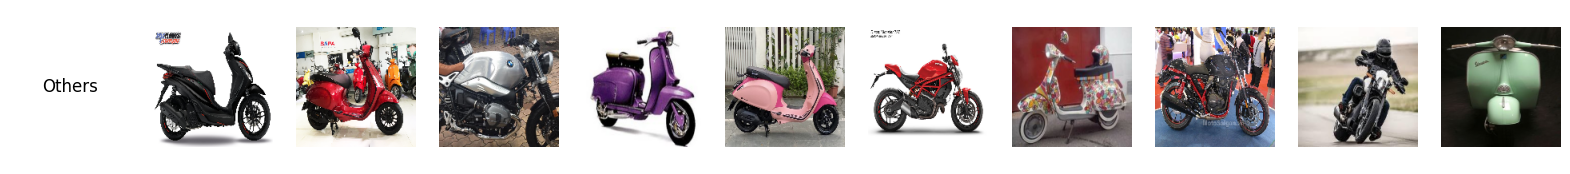

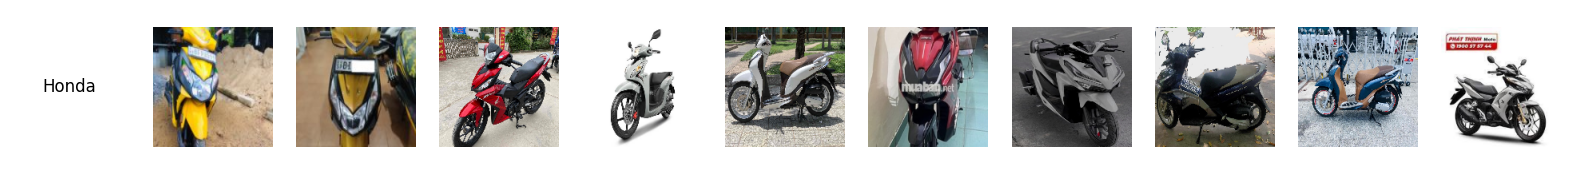

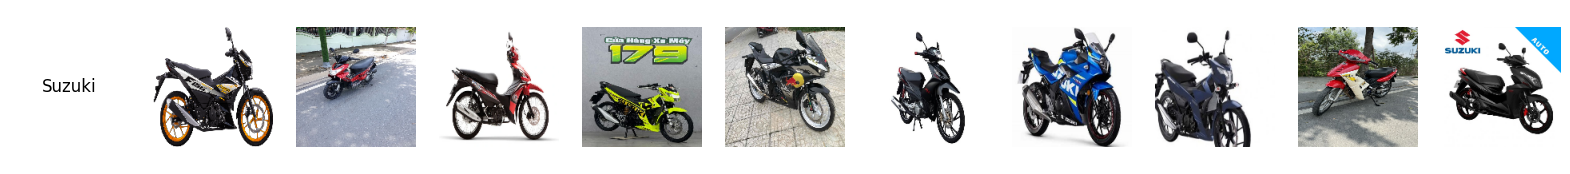

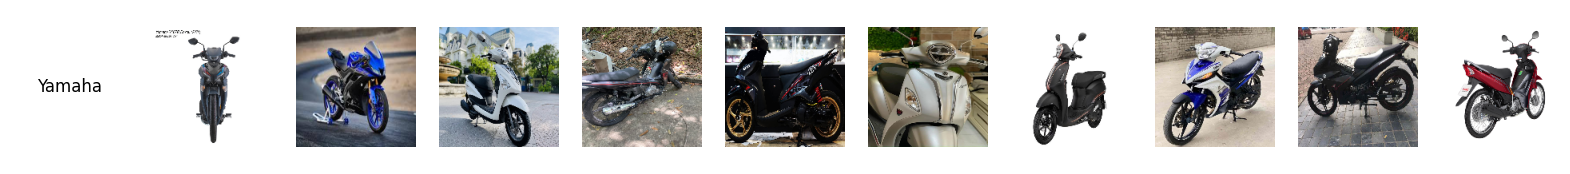

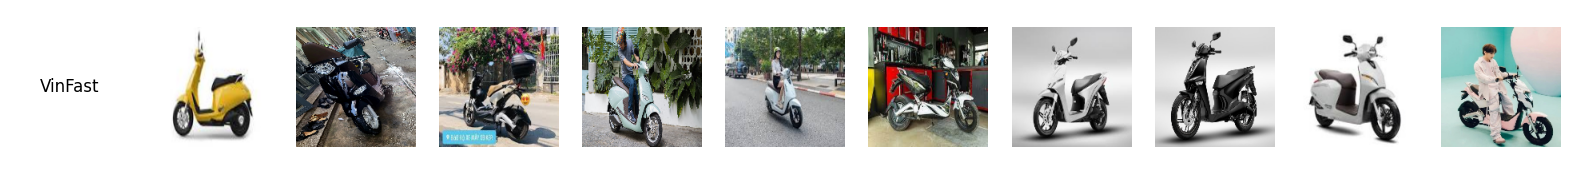

In [77]:
number = 3
show_images('MotocycleDataset-Splits-', str(number) + '-', 'Train')